# Bài ôn tập buổi 9: Titanic
#### Xem xét việc một hành khách có sống sót hay không dựa trên bộ dữ liệu titanic (train.csv có 891 mẫu và test.csv có 418 mẫu )
### Yêu cầu: Hãy đọc dữ liệu từ các tập tin này, áp dụng Logistic Regression để thực hiện việc xác định một hành khách có sống sót hay không dựa trên những thông tin được cung cấp.
1. Đọc dữ liệu train.csv, tiền xử lý dữ liệu nếu cần.
2. Tạo train dataset và test dataset từ dữ liệu ở câu 1 với tỷ lệ dữ liệu test là 0.2
3. Áp dụng thuật toán Logistic Regression: xây dựng model, đánh giá model. 
4. Đọc dữ liệu test.csv. Tiền xử lý dữ liệu như train.csv. Tìm kết quả cho dữ liệu test.
5. Ghi kết quả dự đoán từ test vào file test_pred.csv


In [1]:
train <- read.csv('titanic/train.csv')
test <- read.csv('titanic/test.csv')

In [2]:
print(dim(train))
print(dim(test))

[1] 891  12
[1] 418  11


In [3]:
head(train,3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [4]:
colnames(train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [5]:
colnames(test)

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"

In [6]:
# install.packages('Amelia')

In [7]:
library('Amelia')

Warning message:
"package 'Amelia' was built under R version 4.0.3"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



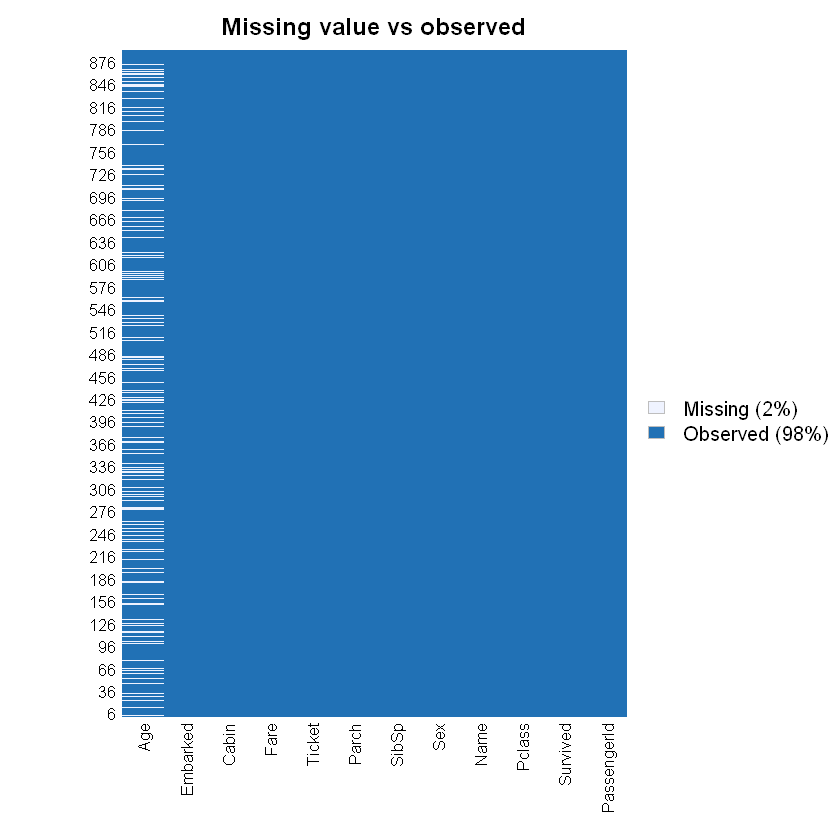

In [8]:
missmap(train, main='Missing value vs observed')

In [9]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [10]:
train = train[,c('Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived')]

In [11]:
library(tidyr)
train <- train %>% drop_na()

In [12]:
train$Sex <- as.factor(train$Sex) 
train$Embarked <- as.factor(train$Embarked)

In [13]:
str(train)

'data.frame':	714 obs. of  8 variables:
 $ Pclass  : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 1 1 1 ...
 $ Age     : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp   : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch   : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 4 4 4 2 4 ...
 $ Survived: int  0 1 1 1 0 0 0 1 1 1 ...


In [14]:
dim(train)

[1] 714   8

In [15]:
trainRowIndex <- sample(1:nrow(train),size=0.8*(nrow(train)), replace=F)
trainingData <- train[trainRowIndex,]
testData <- train[-trainRowIndex,]

In [16]:
print(nrow(trainingData))
print(nrow(testData))

[1] 571
[1] 143


In [17]:
mylogit <- glm(as.factor(Survived)~.,data=trainingData, family='binomial')

In [18]:
# print(summary(mylogit))

In [19]:
head(test,2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S


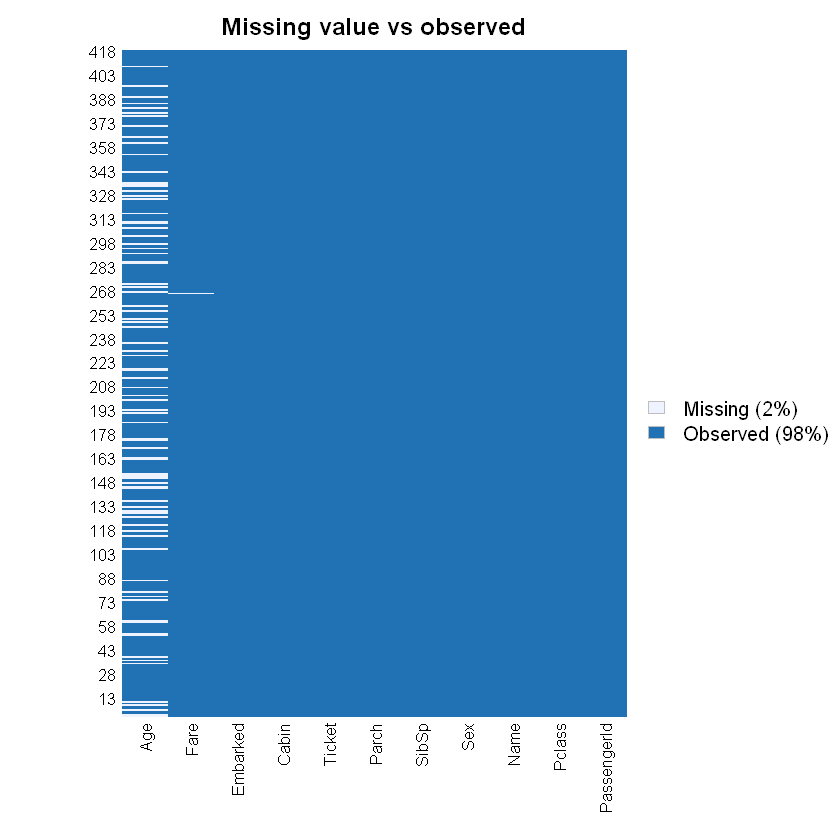

In [20]:
missmap(test, main='Missing value vs observed')

In [21]:
test <- test %>% drop_na()

In [22]:
test = test[,c('Pclass','Sex','Age','SibSp','Parch','Fare','Embarked')]

In [23]:
test$Sex <- as.factor(test$Sex) 
test$Embarked <- as.factor(test$Embarked)

In [24]:
str(test)

'data.frame':	331 obs. of  7 variables:
 $ Pclass  : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


In [26]:
pred <- predict(mylogit, newdata=data.frame(Pclass=test$Pclass,
                                            Sex=test$Sex,
                                            Age=test$Age,
                                            SibSp=test$SibSp,
                                            Parch=test$Parch,
                                            Fare=test$Fare,
                                            Embarked=test$Embarked), 
                type='response')
# pred

In [27]:
# pred

In [28]:
write.csv(x=pred, file="test_pred.csv")